# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

<div class="alert alert-block alert-warning"> Здравствуйте! Задача построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Необходимые шаги прописаны в инструкции, пойдем по порядку. Сначала ознакомимся с данными, проверим их и дальше приступлю к модели. 
    Сначала подгружаю необходимые библиотеки и загружаю данные для ознакомления.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [99]:
try: 
    df1 = pd.read_csv('/datasets/geo_data_0.csv')

    df2 = pd.read_csv('/datasets/geo_data_1.csv')

    df3 = pd.read_csv('/datasets/geo_data_2.csv')
except: 
    df1 = pd.read_csv(r"C:\Users\QWE\Documents\Проекты для GitHub\8\geo_data_0.csv")

    df2 = pd.read_csv(r"C:\Users\QWE\Documents\Проекты для GitHub\8\geo_data_1.csv")

    df3 = pd.read_csv(r"C:\Users\QWE\Documents\Проекты для GitHub\8\geo_data_2.csv")

In [100]:
df1.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [101]:
df1 = df1.drop(['id'], axis=1)
 

In [102]:
df2.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [103]:
df2 = df2.drop(['id'], axis=1)

In [104]:
df3.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [105]:
df3 = df3.drop(['id'], axis=1)

In [106]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [107]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [108]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [112]:
df1.duplicated().sum()

0

In [113]:
df2.duplicated().sum()

0

In [114]:
df3.duplicated().sum()

0

<div class="alert alert-block alert-warning"> Пропусков и дубликатов нет. 
        Далее построим гистограммы по запасам нефти: 

In [115]:
def hist(data, bins, xlim_max, ylim_max):
    plt.figure(figsize=[10, 6])
    plt.hist(data, bins=bins)
    plt.xlim([0, xlim_max])
    plt.ylim([0, ylim_max])
    
    plt.xlabel('Объем количества нефти на скважину (тыс/бар.)')
    plt.ylabel('Количество скавжин') 
    plt.title('Гистограмма распределения скважин по объему')

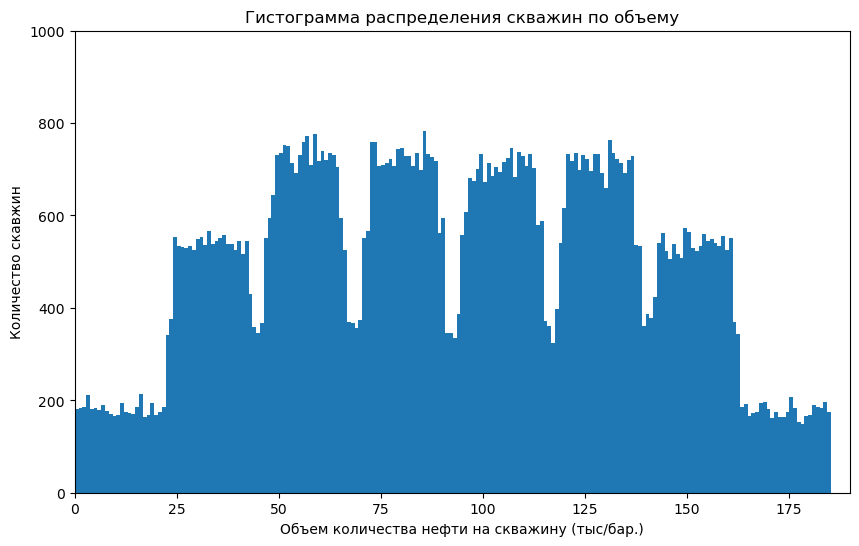

In [116]:
hist(df1['product'], 200, 190, 1000)

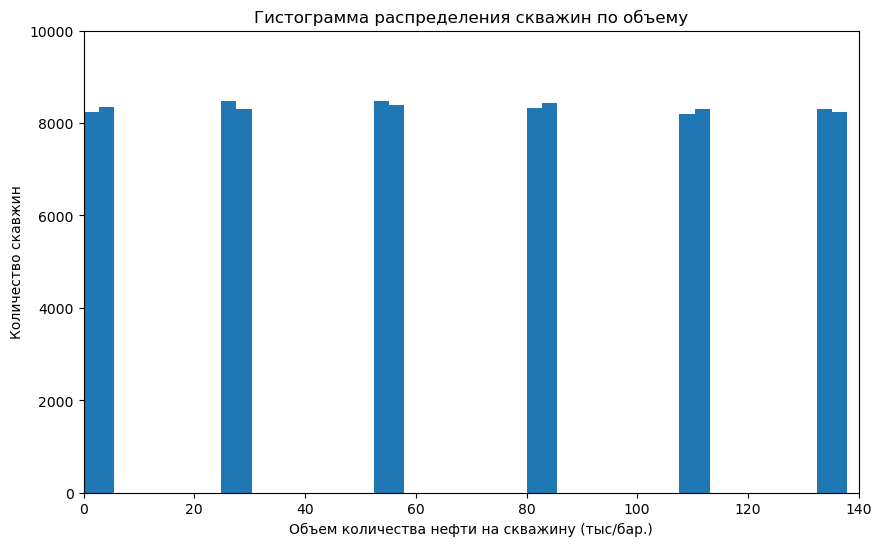

In [117]:
hist(df2['product'], 50, 140, 10000)

<div class="alert alert-block alert-warning"> На графике видно что есть нулевывые значения, далее посчитаю их. 

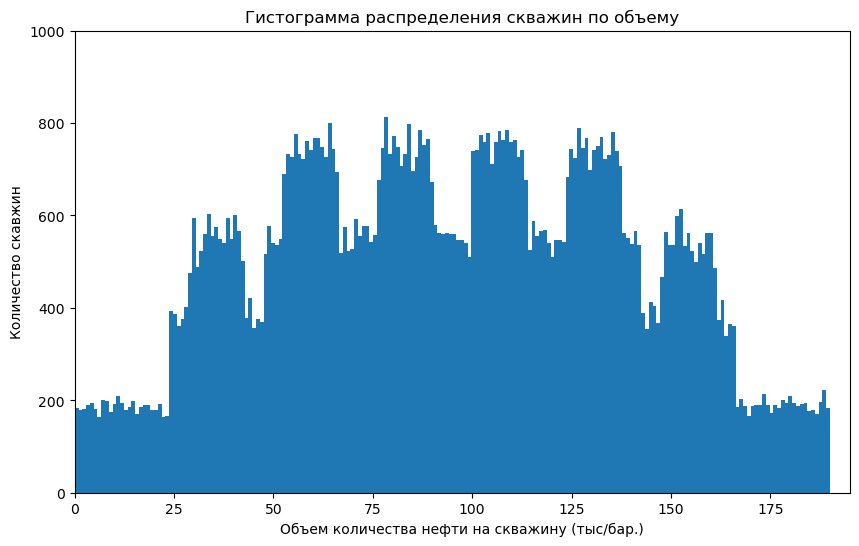

In [118]:
hist(df3['product'], 200, 195, 1000)

<div class="alert alert-block alert-warning"> Посчитаем количество нулей в данных

In [119]:
def null_in_data(df, null):
    null = df[df[null] == 0][null].count()
    dolya = null / df.shape[0]
    print('Количество нулевых значений в колонке: ', null)
    print('Доля нулевых значений', dolya)
    

In [120]:
null_in_data(df1, 'product') 

Количество нулевых значений в колонке:  1
Доля нулевых значений 1e-05


In [121]:
null_in_data(df2, 'product') 

Количество нулевых значений в колонке:  8235
Доля нулевых значений 0.08235


In [122]:
null_in_data(df3, 'product') 

Количество нулевых значений в колонке:  1
Доля нулевых значений 1e-05


<div class="alert alert-block alert-warning"> Во втором регионе по данным вижно что около 8% скважин имеют нулевые значения. Возможно это были разведовательные скважины, для вскрытия нефтяного пласта при геологоразведке. ( у меня нефтяное образование первое, геологоразвдека нефти и газа) 

## Обучение и проверка модели

<div class="alert alert-block alert-warning"> Для разбивки данных на выборки: 

In [123]:
def test_split(df, target):
    features = df.drop([target], axis = 1)
    target = df[target]
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [124]:
features_train1, features_valid1, target_train1, target_valid1 = test_split(df1, 'product')


In [125]:
model = LinearRegression()

model.fit(features_train1,target_train1)
predicted_target1 = model.predict(features_valid1)
print('RMSE: ', mean_squared_error(target_valid1, predicted_target1)**0.5)

RMSE:  37.5794217150813


In [126]:
features_train2, features_valid2, target_train2, target_valid2 = test_split(df2, 'product')


In [127]:
model = LinearRegression()

model.fit(features_train2, target_train2)
predicted_target2 = model.predict(features_valid2)
print('RMSE: ', mean_squared_error(target_valid2, predicted_target2)**0.5)

RMSE:  0.8930992867756169


In [128]:
features_train3, features_valid3, target_train3, target_valid3 = test_split(df3, 'product')


In [129]:
model = LinearRegression()

model.fit(features_train3,target_train3)
predicted_target3 = model.predict(features_valid3)
print('RMSE: ', mean_squared_error(target_valid3, predicted_target3)**0.5)

RMSE:  40.02970873393434


In [130]:
model = LinearRegression()

model.fit(features_train1,target_train1)
predicted_target1 = model.predict(features_valid1)
print('RMSE: ', mean_squared_error(target_valid1, predicted_target1)**0.5)

RMSE:  37.5794217150813


In [131]:
model = LinearRegression()

def predict(df, targets): 
    features = df.drop([targets], axis=1)
    target = df[targets]
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real' : target_valid, 'predicted': predicted_target}
    Data_Frame = pd.DataFrame(data, columns = ['real', 'predicted'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = Data_Frame['predicted'].mean()
    oil = Data_Frame['predicted'].sum()
    return Data_Frame, rmse, mean, oil

In [132]:
df1_predicted, df1_rmse, df1_predicted_mean, df1_predicted_sum = predict(df1, 'product')
print(df1_predicted.head())
print('RMSE :', df1_rmse)
print('средний запас : ', df1_predicted_mean)

             real  predicted
71751   10.038645  95.894952
80493  114.551489  77.572583
2655   132.603635  77.892640
53233  169.072125  90.175134
91141  122.325180  70.510088
RMSE : 37.5794217150813
средний запас :  92.59256778438035


In [133]:
df2_predicted, df2_rmse, df2_predicted_mean, df2_predicted_sum = predict(df2, 'product')
print(df2_predicted.head())
print('RMSE :', df2_rmse)
print('средний запас : ', df2_predicted_mean)

            real  predicted
71751  80.859783  82.663314
80493  53.906522  54.431786
2655   30.132364  29.748760
53233  53.906522  53.552133
91141   0.000000   1.243856
RMSE : 0.8930992867756169
средний запас :  68.728546895446


In [134]:
df3_predicted, df3_rmse, df3_predicted_mean, df3_predicted_sum = predict(df3, 'product')
print(df3_predicted.head())
print('RMSE :', df3_rmse)
print('средний запас : ', df3_predicted_mean)

             real   predicted
71751   61.212375   93.599633
80493   41.850118   75.105159
2655    57.776581   90.066809
53233  100.053761  105.162375
91141  109.897122  115.303310
RMSE : 40.02970873393434
средний запас :  94.96504596800492


In [135]:
print('Суммарный предсказанный запас в 1 регионе ', df1_predicted_sum)
print('Суммарный реальный запас в 1 регионе ', df1_predicted['real'].sum())
print()
print('Суммарный предсказанный запас в 2 регионе ', df2_predicted_sum)
print('Суммарный реальный запас в 2 регионе ', df2_predicted['real'].sum())
print()
print('Суммарный предсказанный запас в 3 регионе ', df3_predicted_sum)
print('Суммарный реальный запас в 3 регионе ', df3_predicted['real'].sum())

Суммарный предсказанный запас в 1 регионе  2314814.194609509
Суммарный реальный запас в 1 регионе  2301964.918520732

Суммарный предсказанный запас в 2 регионе  1718213.67238615
Суммарный реальный запас в 2 регионе  1718078.4006089992

Суммарный предсказанный запас в 3 регионе  2374126.149200123
Суммарный реальный запас в 3 регионе  2372105.8202213594


<div class="alert alert-block alert-warning"> Модель обучена и сработала. Изменение парамаетров не требуется. А данные предсказанных запасов и реальных очень близки. Лучше всего модель сработала во 2 регионе, RMSE - 0.893. 

## Подготовка к расчёту прибыли

<div class="alert alert-block alert-warning"> Рассчитваем разработку на 200 скважин и среднее количество нефти для безубыточной разработки в регонах. 

In [136]:
budget = 10000000000
well = 500
best_well = 200 
barrel_price = 450000

average_profit_per_well = budget / best_well
print('Средняя прибыль на скважину -', average_profit_per_well, 'тыс.руб.')

average_barrels_per_well = average_profit_per_well  / barrel_price
print('Средний объем нефти на скважину  -',average_barrels_per_well, 'тыс. баррелей')

average_barrels = budget / barrel_price
print('Средний объем нефти в регионе -', average_barrels, 'тыс. баррелей')

Средняя прибыль на скважину - 50000000.0 тыс.руб.
Средний объем нефти на скважину  - 111.11111111111111 тыс. баррелей
Средний объем нефти в регионе - 22222.222222222223 тыс. баррелей


In [137]:
print('Средний запас нефти на скважину в 1 регионе', df1['product'].mean())
print('Средний запас нефти на скважину в 2 регионе', df2['product'].mean())
print('Средний запас нефти на скважину в 3 регионе', df3['product'].mean())

Средний запас нефти на скважину в 1 регионе 92.50000000000001
Средний запас нефти на скважину в 2 регионе 68.82500000000002
Средний запас нефти на скважину в 3 регионе 95.00000000000004


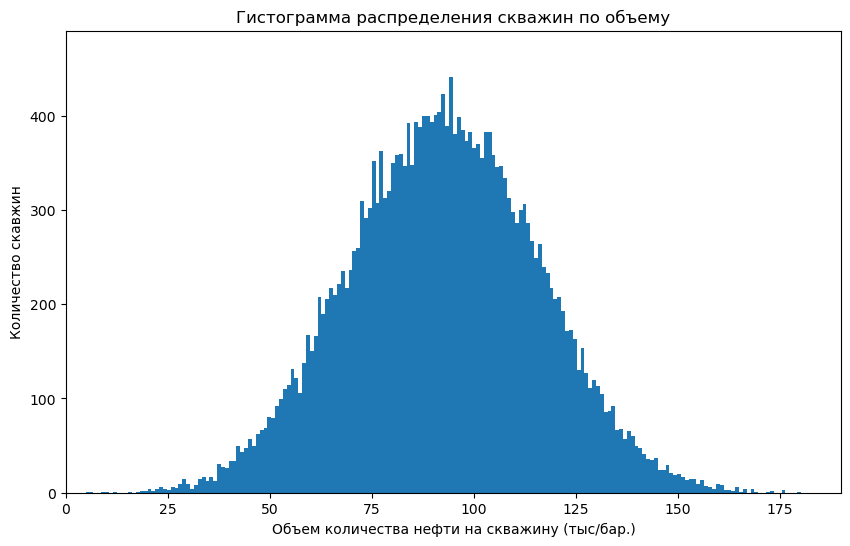

In [138]:
hist(df1_predicted['predicted'], 200, 190, 490)

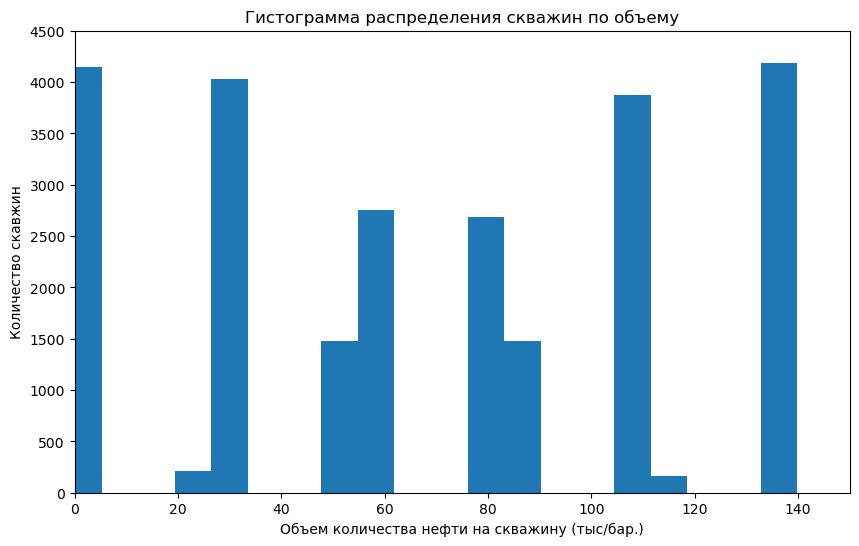

In [139]:
hist(df2_predicted['predicted'], 20, 150, 4500)

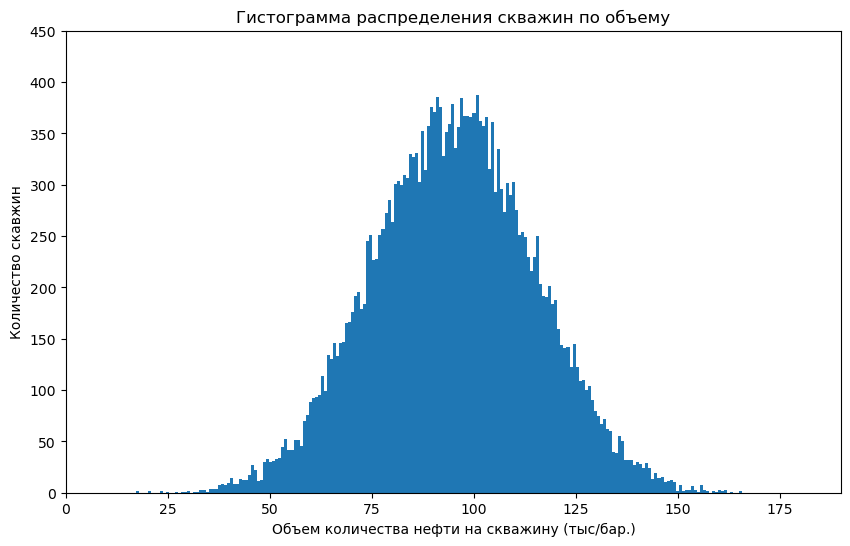

In [140]:
hist(df3_predicted['predicted'], 200, 190, 450)

<div class="alert alert-block alert-warning"> 
     Можно сказать что в 1 и 3 регионе кол-во нефти в среднем на скважину больше, чем во 2. Далее досчитаем риски и прибыли 
    
    1) Средний запас нефти на скважину в 1 регионе 92.
    
    2) Средний запас нефти на скважину в 2 регионе 68.
    
    3) Средний запас нефти на скважину в 3 регионе 95.
    
         

## Расчёт прибыли и рисков 

In [141]:
def oil_profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return barrel_price * selected.sum() - budget

In [142]:
state = np.random.RandomState(12345)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=well)
        probs_sample = probs[target_sample.index]
        profit = oil_profit(target, probs_sample, best_well)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [143]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(df1_predicted['real'], df1_predicted['predicted'])
print('Данные по региону №1.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по региону №1.
Средняя прибыль по региону = 396164984.80 тыс.руб.
95% доверительный интервал от -111215545.89 до 909766941.55 тыс.руб.
Процент риска 6.90%


In [144]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(df2_predicted['real'], df2_predicted['predicted'])
print('Данные по региону №2.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по региону №2.
Средняя прибыль по региону = 461155817.28 тыс.руб.
95% доверительный интервал от 78050810.75 до 862952060.26 тыс.руб.
Процент риска 0.70%


In [145]:
average_3, lower_3, upper_3, risk_3  = bootstrap_1000(df3_predicted['real'], df3_predicted['predicted'])
print('Данные по региону №3.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_3))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска {:.2%}'.format(risk_3))

Данные по региону №3.
Средняя прибыль по региону = 392950475.17 тыс.руб.
95% доверительный интервал от -112227625.38 до 934562914.55 тыс.руб.
Процент риска 6.50%


<div class="alert alert-block alert-warning"> В 1 и 3 регионе слишком большие риски - 7.2 и 7.4% . Во втором регионе 1.3%, что удовлетворяет условиям задачи. Довреительный интервал показывает что, при практически при любом выбре скважин, разработка принесет прибыль.

<div class="alert alert-block alert-warning"> 1. Данные изучены
2. Модель обучена и построена 
3. Посчитана прибыли в регионе через фукнцию
4. Вывод по итогу работы
